In [63]:
import matplotlib as mpl
mpl.use('TkAgg')
# Make sure output is into notebook
%matplotlib inline
import matplotlib.pyplot as plt

import pysal as ps
import numpy as np
import pandas as pd
import geopandas as gpd
import seaborn as sns
import matplotlib.cm as cm
import urllib
import zipfile
import re
import os
import requests

import shapely
from shapely.geometry import Point

import random 
random.seed(123456789) # For reproducibility

# Make numeric display a bit easier
pd.set_option('display.float_format', lambda x: '{:,.4f}'.format(x))

In [18]:
src = 'https://github.com/cusp-london/Spatial-Data-Analysis/blob/master/LSOA_IMD.zip?raw=true'
dst = 'analysis/LSOA_IMD.zip'
zpd = 'analysis/'

if not os.path.exists(dst):
    if not os.path.exists(os.path.dirname(dst)):
        os.makedirs(os.path.dirname(dst))
    
    r = requests.get(src, stream=True)
    
    with open(dst, 'wb') as fd:
        for chunk in r.iter_content(chunk_size=128):
            fd.write(chunk)

if not os.path.exists(zpd):
    os.makedirs(os.path.dirname(zpd))
    
zp = zipfile.ZipFile(dst, 'r')
zp.extractall(zpd)
zp.close()    

print("Done.")

Done.


In [19]:
lsoas = gpd.read_file(os.path.join('analysis','LSOA_IMD','LSOA_IMD2019.shp'))
print("Shape of LSOA file: {0} rows by {1} columns".format(lsoas.shape[0], lsoas.shape[1]))
lsoas.set_index('lsoa11cd', drop=True, inplace=True)
lsoas.head()

Shape of LSOA file: 4946 rows by 67 columns


,objectid,lsoa11nm,lsoa11nmw,st_areasha,st_lengths,IMD_Rand,IMD_Decile,LSOA01NM,LADcd,LADnm,...,OutRank,OutDec,TotScore,TotRank,TotDec,DepChi,Pop16_59,Pop60_,WorkPop,geometry
lsoa11cd,,,,,,,,,,,,,,,,,,,,,
E01000001,1,City of London 001A,City of London 001A,"133,320.7689","2,291.8461",29199,9,City of London 001A,E09000001,City of London,...,1615,1,1296,175,656,465,715.0000,"343,907.4198","3,682.4394","POLYGON ((532095.563 181577.351, 532095.125 18..."
E01000002,2,City of London 001B,City of London 001B,"226,191.2730","2,433.9601",30379,10,City of London 001B,E09000001,City of London,...,2969,1,1156,182,580,394,619.7500,"583,474.0418","3,910.3872","POLYGON ((532267.728 181643.781, 532262.875 18..."
E01000003,3,City of London 001C,City of London 001C,"57,302.9665","1,142.3598",14915,5,City of London 001C,E09000001,City of London,...,162,1,1350,146,759,445,804.0000,"147,839.5061","1,834.9313","POLYGON ((532105.312 182010.574, 532104.872 18..."
E01000005,4,City of London 001E,City of London 001E,"190,738.7605","2,167.8683",8678,3,City of London 001E,E09000001,City of London,...,849,1,1121,229,692,200,683.0000,"491,918.0930","3,483.1792","POLYGON ((533610.974 181410.968, 533615.622 18..."
E01000006,5,Barking and Dagenham 016A,Barking and Dagenham 016A,"144,195.8469","1,935.5104",14486,5,Barking and Dagenham 016A,E09000002,Barking and Dagenham,...,4368,2,2040,522,1297,221,"1,284.5000","372,257.3212","3,108.6108","POLYGON ((544817.826 184346.261, 544815.791 18..."


In [20]:
haringey=lsoas.loc[lsoas['LADcd']== 'E09000014']
haringey.head()

,objectid,lsoa11nm,lsoa11nmw,st_areasha,st_lengths,IMD_Rand,IMD_Decile,LSOA01NM,LADcd,LADnm,...,OutRank,OutDec,TotScore,TotRank,TotDec,DepChi,Pop16_59,Pop60_,WorkPop,geometry
lsoa11cd,,,,,,,,,,,,,,,,,,,,,
E01001962,1915,Haringey 004A,Haringey 004A,"514,874.6848","5,185.3527",18441,6,Haringey 004A,E09000014,Haringey,...,2626,1,1804,478,1048,278,"1,027.7500","1,333,192.6538","8,342.0587","POLYGON ((529606.580 191035.475, 529606.332 19..."
E01001963,1916,Haringey 009A,Haringey 009A,"508,767.6499","3,763.7969",26300,9,Haringey 009A,E09000014,Haringey,...,3251,1,1818,471,1027,320,"1,016.5000","1,317,145.4235","6,055.1259","POLYGON ((528604.735 190659.793, 528607.045 19..."
E01001964,1917,Haringey 009B,Haringey 009B,"635,736.7383","4,061.1343",19124,6,Haringey 009B,E09000014,Haringey,...,1863,1,1662,285,1152,225,"1,142.2500","1,645,448.1548","6,533.1733","POLYGON ((529776.496 190565.240, 529775.000 19..."
E01001965,1918,Haringey 009C,Haringey 009C,"121,595.2813","2,273.2274",23030,8,Haringey 009C,E09000014,Haringey,...,3597,2,1705,435,1050,220,"1,064.7500","314,781.7596","3,655.1687","POLYGON ((529842.485 190883.940, 529842.854 19..."
E01001966,1919,Haringey 009D,Haringey 009D,"512,626.6351","4,303.3919",20730,7,Haringey 009D,E09000014,Haringey,...,2723,1,1463,328,827,308,835.7500,"1,326,730.4363","6,923.3281","POLYGON ((529543.780 190473.389, 529552.392 19..."


In [89]:
haringeytotal=haringey.reset_index()
haringeytotal.rename(columns={'index':'lsoa'},inplace=True)

In [90]:
haringeytotal

,lsoa11cd,objectid,lsoa11nm,lsoa11nmw,st_areasha,st_lengths,IMD_Rand,IMD_Decile,LSOA01NM,LADcd,...,OutRank,OutDec,TotScore,TotRank,TotDec,DepChi,Pop16_59,Pop60_,WorkPop,geometry
0,E01001962,1915,Haringey 004A,Haringey 004A,"514,874.6848","5,185.3527",18441,6,Haringey 004A,E09000014,...,2626,1,1804,478,1048,278,"1,027.7500","1,333,192.6538","8,342.0587","POLYGON ((529606.580 191035.475, 529606.332 19..."
1,E01001963,1916,Haringey 009A,Haringey 009A,"508,767.6499","3,763.7969",26300,9,Haringey 009A,E09000014,...,3251,1,1818,471,1027,320,"1,016.5000","1,317,145.4235","6,055.1259","POLYGON ((528604.735 190659.793, 528607.045 19..."
2,E01001964,1917,Haringey 009B,Haringey 009B,"635,736.7383","4,061.1343",19124,6,Haringey 009B,E09000014,...,1863,1,1662,285,1152,225,"1,142.2500","1,645,448.1548","6,533.1733","POLYGON ((529776.496 190565.240, 529775.000 19..."
3,E01001965,1918,Haringey 009C,Haringey 009C,"121,595.2813","2,273.2274",23030,8,Haringey 009C,E09000014,...,3597,2,1705,435,1050,220,"1,064.7500","314,781.7596","3,655.1687","POLYGON ((529842.485 190883.940, 529842.854 19..."
4,E01001966,1919,Haringey 009D,Haringey 009D,"512,626.6351","4,303.3919",20730,7,Haringey 009D,E09000014,...,2723,1,1463,328,827,308,835.7500,"1,326,730.4363","6,923.3281","POLYGON ((529543.780 190473.389, 529552.392 19..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,E01002104,2055,Haringey 008D,Haringey 008D,"170,526.3938","2,574.8878",10478,4,Haringey 008D,E09000014,...,2126,1,1658,291,1101,266,"1,099.7500","441,494.3575","4,141.9940","POLYGON ((531811.627 190915.174, 531809.000 19..."
141,E01002105,2056,Haringey 007D,Haringey 007D,"124,676.8009","1,895.7552",9038,3,Haringey 007D,E09000014,...,753,1,2291,366,1679,246,"1,675.0000","322,750.0405","3,050.3159","POLYGON ((531072.515 190873.909, 531079.888 19..."
142,E01032575,31762,Haringey 037D,Haringey 037D,"146,595.0580","2,494.5775",4997,2,Haringey 037D,E09000014,...,1935,1,2007,523,1283,201,"1,241.7500","379,586.3921","4,014.6503","POLYGON ((533665.890 191659.205, 533663.931 19..."
143,E01033085,32236,Haringey 020E,Haringey 020E,"156,051.7710","2,410.5736",8816,3,Haringey 020E,E09000014,...,1924,1,1933,293,1523,117,"1,525.0000","403,788.3183","3,877.9489","POLYGON ((530494.361 189545.890, 530495.000 18..."


In [30]:
lsoa=pd.read_csv('/Users/mac/Desktop/MPS_LSOA_Level Crime.csv')

In [31]:
lsoa

,LSOA Code,Borough,Major Category,Minor Category,201807,201808,201809,201810,201811,201812,...,201909,201910,201911,201912,202001,202002,202003,202004,202005,202006
0,E01000006,Barking and Dagenham,Arson and Criminal Damage,Arson,0,0,0,0,0,0,...,0,0,0,0,0,0,2,0,0,0
1,E01000008,Barking and Dagenham,Arson and Criminal Damage,Arson,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,E01000009,Barking and Dagenham,Arson and Criminal Damage,Arson,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,0,0
3,E01000010,Barking and Dagenham,Arson and Criminal Damage,Arson,1,0,0,1,0,0,...,0,2,0,0,0,0,0,0,0,0
4,E01000015,Barking and Dagenham,Arson and Criminal Damage,Arson,0,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103454,E01033604,Westminster,Violence Against the Person,Violence without Injury,12,3,4,8,5,9,...,0,8,3,6,10,7,7,3,4,7
103455,E01033605,Westminster,Violence Against the Person,Violence without Injury,3,3,2,2,3,6,...,3,4,5,1,3,3,1,5,4,4
103456,E01033606,Westminster,Violence Against the Person,Violence without Injury,0,1,1,2,0,0,...,0,0,1,3,1,2,2,1,1,1
103457,E01033607,Westminster,Violence Against the Person,Violence without Injury,2,4,2,3,4,0,...,1,2,3,0,1,0,0,1,3,1


In [35]:
a=lsoa.loc[lsoa['Minor Category']== 'Possession of Article with Blade or Point']
a.head()

,LSOA Code,Borough,Major Category,Minor Category,201807,201808,201809,201810,201811,201812,...,201909,201910,201911,201912,202001,202002,202003,202004,202005,202006
913,E01000007,Barking and Dagenham,Possession of Weapons,Possession of Article with Blade or Point,0,0,0,1,0,1,...,0,1,0,0,0,0,1,1,0,0
914,E01000009,Barking and Dagenham,Possession of Weapons,Possession of Article with Blade or Point,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
915,E01000010,Barking and Dagenham,Possession of Weapons,Possession of Article with Blade or Point,0,0,0,4,1,0,...,1,0,1,0,2,0,0,0,1,1
916,E01000013,Barking and Dagenham,Possession of Weapons,Possession of Article with Blade or Point,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
917,E01000015,Barking and Dagenham,Possession of Weapons,Possession of Article with Blade or Point,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [42]:
b=a.loc[a['Borough']== 'Haringey']

In [43]:
b

,LSOA Code,Borough,Major Category,Minor Category,201807,201808,201809,201810,201811,201812,...,201909,201910,201911,201912,202001,202002,202003,202004,202005,202006
43141,E01001964,Haringey,Possession of Weapons,Possession of Article with Blade or Point,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
43142,E01001966,Haringey,Possession of Weapons,Possession of Article with Blade or Point,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
43143,E01001970,Haringey,Possession of Weapons,Possession of Article with Blade or Point,0,0,0,0,0,1,...,0,0,0,0,0,2,0,0,1,0
43144,E01001971,Haringey,Possession of Weapons,Possession of Article with Blade or Point,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
43145,E01001973,Haringey,Possession of Weapons,Possession of Article with Blade or Point,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43227,E01002104,Haringey,Possession of Weapons,Possession of Article with Blade or Point,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
43228,E01002105,Haringey,Possession of Weapons,Possession of Article with Blade or Point,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
43229,E01032575,Haringey,Possession of Weapons,Possession of Article with Blade or Point,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
43230,E01033085,Haringey,Possession of Weapons,Possession of Article with Blade or Point,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0


In [44]:
b.to_csv('/Users/mac/Desktop/blade.csv')

In [48]:
crime=pd.read_csv('/Users/mac/Desktop/blade crime.csv')

In [49]:
crime

,Unnamed: 0,LSOA Code,Borough,Major Category,Minor Category,total
0,43141,E01001964,Haringey,Possession of Weapons,Possession of Article with Blade or Point,1
1,43142,E01001966,Haringey,Possession of Weapons,Possession of Article with Blade or Point,1
2,43143,E01001970,Haringey,Possession of Weapons,Possession of Article with Blade or Point,5
3,43144,E01001971,Haringey,Possession of Weapons,Possession of Article with Blade or Point,2
4,43145,E01001973,Haringey,Possession of Weapons,Possession of Article with Blade or Point,2
...,...,...,...,...,...,...
86,43227,E01002104,Haringey,Possession of Weapons,Possession of Article with Blade or Point,1
87,43228,E01002105,Haringey,Possession of Weapons,Possession of Article with Blade or Point,3
88,43229,E01032575,Haringey,Possession of Weapons,Possession of Article with Blade or Point,5
89,43230,E01033085,Haringey,Possession of Weapons,Possession of Article with Blade or Point,2


In [95]:
df3=pd.merge(haringeytotal,crime,left_on='lsoa11cd',right_on="LSOA Code",how='outer')


In [96]:
df3

,lsoa11cd,objectid,lsoa11nm,lsoa11nmw,st_areasha,st_lengths,IMD_Rand,IMD_Decile,LSOA01NM,LADcd,...,Pop16_59,Pop60_,WorkPop,geometry,Unnamed: 0,LSOA Code,Borough,Major Category,Minor Category,total
0,E01001962,1915,Haringey 004A,Haringey 004A,"514,874.6848","5,185.3527",18441,6,Haringey 004A,E09000014,...,"1,027.7500","1,333,192.6538","8,342.0587","POLYGON ((529606.580 191035.475, 529606.332 19...",nan,NaN,NaN,NaN,NaN,nan
1,E01001963,1916,Haringey 009A,Haringey 009A,"508,767.6499","3,763.7969",26300,9,Haringey 009A,E09000014,...,"1,016.5000","1,317,145.4235","6,055.1259","POLYGON ((528604.735 190659.793, 528607.045 19...",nan,NaN,NaN,NaN,NaN,nan
2,E01001964,1917,Haringey 009B,Haringey 009B,"635,736.7383","4,061.1343",19124,6,Haringey 009B,E09000014,...,"1,142.2500","1,645,448.1548","6,533.1733","POLYGON ((529776.496 190565.240, 529775.000 19...","43,141.0000",E01001964,Haringey,Possession of Weapons,Possession of Article with Blade or Point,1.0000
3,E01001965,1918,Haringey 009C,Haringey 009C,"121,595.2813","2,273.2274",23030,8,Haringey 009C,E09000014,...,"1,064.7500","314,781.7596","3,655.1687","POLYGON ((529842.485 190883.940, 529842.854 19...",nan,NaN,NaN,NaN,NaN,nan
4,E01001966,1919,Haringey 009D,Haringey 009D,"512,626.6351","4,303.3919",20730,7,Haringey 009D,E09000014,...,835.7500,"1,326,730.4363","6,923.3281","POLYGON ((529543.780 190473.389, 529552.392 19...","43,142.0000",E01001966,Haringey,Possession of Weapons,Possession of Article with Blade or Point,1.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,E01002104,2055,Haringey 008D,Haringey 008D,"170,526.3938","2,574.8878",10478,4,Haringey 008D,E09000014,...,"1,099.7500","441,494.3575","4,141.9940","POLYGON ((531811.627 190915.174, 531809.000 19...","43,227.0000",E01002104,Haringey,Possession of Weapons,Possession of Article with Blade or Point,1.0000
141,E01002105,2056,Haringey 007D,Haringey 007D,"124,676.8009","1,895.7552",9038,3,Haringey 007D,E09000014,...,"1,675.0000","322,750.0405","3,050.3159","POLYGON ((531072.515 190873.909, 531079.888 19...","43,228.0000",E01002105,Haringey,Possession of Weapons,Possession of Article with Blade or Point,3.0000
142,E01032575,31762,Haringey 037D,Haringey 037D,"146,595.0580","2,494.5775",4997,2,Haringey 037D,E09000014,...,"1,241.7500","379,586.3921","4,014.6503","POLYGON ((533665.890 191659.205, 533663.931 19...","43,229.0000",E01032575,Haringey,Possession of Weapons,Possession of Article with Blade or Point,5.0000
143,E01033085,32236,Haringey 020E,Haringey 020E,"156,051.7710","2,410.5736",8816,3,Haringey 020E,E09000014,...,"1,525.0000","403,788.3183","3,877.9489","POLYGON ((530494.361 189545.890, 530495.000 18...","43,230.0000",E01033085,Haringey,Possession of Weapons,Possession of Article with Blade or Point,2.0000


In [97]:
df3['total'].fillna(0,inplace=True)

In [98]:
df3

,lsoa11cd,objectid,lsoa11nm,lsoa11nmw,st_areasha,st_lengths,IMD_Rand,IMD_Decile,LSOA01NM,LADcd,...,Pop16_59,Pop60_,WorkPop,geometry,Unnamed: 0,LSOA Code,Borough,Major Category,Minor Category,total
0,E01001962,1915,Haringey 004A,Haringey 004A,"514,874.6848","5,185.3527",18441,6,Haringey 004A,E09000014,...,"1,027.7500","1,333,192.6538","8,342.0587","POLYGON ((529606.580 191035.475, 529606.332 19...",nan,NaN,NaN,NaN,NaN,0.0000
1,E01001963,1916,Haringey 009A,Haringey 009A,"508,767.6499","3,763.7969",26300,9,Haringey 009A,E09000014,...,"1,016.5000","1,317,145.4235","6,055.1259","POLYGON ((528604.735 190659.793, 528607.045 19...",nan,NaN,NaN,NaN,NaN,0.0000
2,E01001964,1917,Haringey 009B,Haringey 009B,"635,736.7383","4,061.1343",19124,6,Haringey 009B,E09000014,...,"1,142.2500","1,645,448.1548","6,533.1733","POLYGON ((529776.496 190565.240, 529775.000 19...","43,141.0000",E01001964,Haringey,Possession of Weapons,Possession of Article with Blade or Point,1.0000
3,E01001965,1918,Haringey 009C,Haringey 009C,"121,595.2813","2,273.2274",23030,8,Haringey 009C,E09000014,...,"1,064.7500","314,781.7596","3,655.1687","POLYGON ((529842.485 190883.940, 529842.854 19...",nan,NaN,NaN,NaN,NaN,0.0000
4,E01001966,1919,Haringey 009D,Haringey 009D,"512,626.6351","4,303.3919",20730,7,Haringey 009D,E09000014,...,835.7500,"1,326,730.4363","6,923.3281","POLYGON ((529543.780 190473.389, 529552.392 19...","43,142.0000",E01001966,Haringey,Possession of Weapons,Possession of Article with Blade or Point,1.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,E01002104,2055,Haringey 008D,Haringey 008D,"170,526.3938","2,574.8878",10478,4,Haringey 008D,E09000014,...,"1,099.7500","441,494.3575","4,141.9940","POLYGON ((531811.627 190915.174, 531809.000 19...","43,227.0000",E01002104,Haringey,Possession of Weapons,Possession of Article with Blade or Point,1.0000
141,E01002105,2056,Haringey 007D,Haringey 007D,"124,676.8009","1,895.7552",9038,3,Haringey 007D,E09000014,...,"1,675.0000","322,750.0405","3,050.3159","POLYGON ((531072.515 190873.909, 531079.888 19...","43,228.0000",E01002105,Haringey,Possession of Weapons,Possession of Article with Blade or Point,3.0000
142,E01032575,31762,Haringey 037D,Haringey 037D,"146,595.0580","2,494.5775",4997,2,Haringey 037D,E09000014,...,"1,241.7500","379,586.3921","4,014.6503","POLYGON ((533665.890 191659.205, 533663.931 19...","43,229.0000",E01032575,Haringey,Possession of Weapons,Possession of Article with Blade or Point,5.0000
143,E01033085,32236,Haringey 020E,Haringey 020E,"156,051.7710","2,410.5736",8816,3,Haringey 020E,E09000014,...,"1,525.0000","403,788.3183","3,877.9489","POLYGON ((530494.361 189545.890, 530495.000 18...","43,230.0000",E01033085,Haringey,Possession of Weapons,Possession of Article with Blade or Point,2.0000


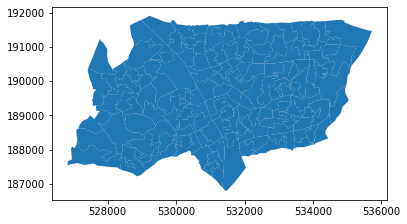

In [99]:
df3.plot()

In [103]:
imdei = ps.viz.mapclassify.Equal_Interval(df3['total'], k=7) # k is the number of colors that will be plotted on the map
imdei

             Equal Interval             
 
Lower            Upper             Count
         x[i] <=  1.714               90
 1.714 < x[i] <=  3.429               36
 3.429 < x[i] <=  5.143               11
 5.143 < x[i] <=  6.857                2
 6.857 < x[i] <=  8.571                5
 8.571 < x[i] <= 10.286                0
10.286 < x[i] <= 12.000                1

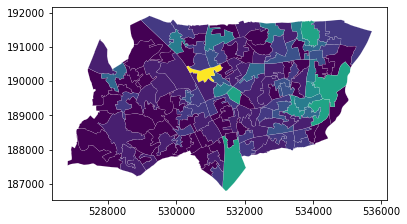

In [104]:
df3.plot(column='total', alpha=1, 
         edgecolor='w', linewidth=0.1)

In [142]:
Pub = gpd.read_file(os.path.join('data','London_Pubs','London_Pubs.shp'))

In [143]:
Pub

,F1,name,latitude,longitude,lsoa,strNearest,intNearest,bakerloo,circle,hammersmit,...,F21,id,latitude1,longitude1,name1,display_na,zone,total_line,rail,geometry
0,0.0000,The Green Man,51.5237,-0.1432,Westminster 013A,Great Portland Street,104.0000,0,0,0,...,None,1.0000,51.5028,-0.2801,Acton Town,Acton<br />Town,3.0000,2.0000,0.0000,POINT (-0.14321 51.52368)
1,1.0000,The Jeremy Bentham,51.5235,-0.1356,Camden 026D,Euston Square,90.0000,0,0,0,...,None,2.0000,51.5143,-0.0755,Aldgate,NULL,1.0000,2.0000,0.0000,POINT (-0.13560 51.52354)
2,2.0000,The Dignity,51.6008,-0.1946,Barnet 028A,Finchley Central,93.0000,0,0,0,...,None,3.0000,51.5154,-0.0726,Aldgate East,Aldgate<br />East,1.0000,2.0000,0.0000,POINT (-0.19461 51.60084)
3,3.0000,The Catcher in the Rye,51.5996,-0.1960,Barnet 028A,Finchley Central,93.0000,0,0,0,...,None,4.0000,51.5107,-0.0130,All Saints,All<br />Saints,2.0000,1.0000,0.0000,POINT (-0.19601 51.59959)
4,4.0000,The Tally Ho,51.6141,-0.1765,Barnet 019F,Woodside Park,302.0000,0,0,0,...,None,5.0000,51.5407,-0.2997,Alperton,NULL,4.0000,1.0000,0.0000,POINT (-0.17650 51.61410)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3332,"3,332.0000",The Duke of Kendal,51.5146,-0.1661,Westminster 015E,Edgware Road (B),82.0000,-1,0,0,...,None,0.0000,0.0000,0.0000,None,None,0.0000,0.0000,0.0000,POINT (-0.16608 51.51455)
3333,"3,333.0000",The Mitre,51.4068,-0.0639,Bromley 015D,New Cross Gate,175.0000,0,0,0,...,None,0.0000,0.0000,0.0000,None,None,0.0000,0.0000,0.0000,POINT (-0.06385 51.40681)
3334,"3,334.0000",The Hemingway,51.5372,-0.0490,Hackney 022A,Bethnal Green,24.0000,0,0,0,...,None,0.0000,0.0000,0.0000,None,None,0.0000,0.0000,0.0000,POINT (-0.04899 51.53717)
3335,"3,335.0000",The Victory,51.5346,-0.0555,Tower Hamlets 002A,Bethnal Green,24.0000,0,0,0,...,None,0.0000,0.0000,0.0000,None,None,0.0000,0.0000,0.0000,POINT (-0.05553 51.53463)


In [150]:
pubmerge=pd.merge(df3,Pub,left_on='lsoa11nm',right_on="lsoa",how='right')

In [151]:
pubmerge

,lsoa11cd,objectid,lsoa11nm,lsoa11nmw,st_areasha,st_lengths,IMD_Rand,IMD_Decile,LSOA01NM,LADcd,...,F21,id,latitude1,longitude1,name1,display_na,zone,total_line,rail,geometry_y
0,E01001966,"1,919.0000",Haringey 009D,Haringey 009D,"512,626.6351","4,303.3919","20,730.0000",7.0000,Haringey 009D,E09000014,...,None,0.0000,0.0000,0.0000,None,None,0.0000,0.0000,0.0000,POINT (-0.13796 51.59886)
1,E01001970,"1,923.0000",Haringey 004B,Haringey 004B,"214,968.3304","3,085.2967","9,598.0000",3.0000,Haringey 004B,E09000014,...,None,0.0000,0.0000,0.0000,None,None,0.0000,0.0000,0.0000,POINT (-0.12274 51.60555)
2,E01001972,"1,925.0000",Haringey 004C,Haringey 004C,"206,621.1776","2,342.4809","9,943.0000",4.0000,Haringey 004C,E09000014,...,None,0.0000,0.0000,0.0000,None,None,0.0000,0.0000,0.0000,POINT (-0.11954 51.59827)
3,E01001973,"1,926.0000",Haringey 004D,Haringey 004D,"400,615.2950","3,207.2109","15,884.0000",5.0000,Haringey 004D,E09000014,...,None,0.0000,0.0000,0.0000,None,None,0.0000,0.0000,0.0000,POINT (-0.12727 51.60874)
4,E01001978,"1,931.0000",Haringey 011C,Haringey 011C,"132,003.2345","2,615.6684","4,152.0000",2.0000,Haringey 011C,E09000014,...,None,0.0000,0.0000,0.0000,None,None,0.0000,0.0000,0.0000,POINT (-0.07594 51.59835)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3332,NaN,nan,NaN,NaN,nan,nan,nan,nan,NaN,NaN,...,NaN,0.0000,0.0000,0.0000,NaN,NaN,0.0000,0.0000,0.0000,POINT (-0.08637 51.55062)
3333,NaN,nan,NaN,NaN,nan,nan,nan,nan,NaN,NaN,...,NaN,0.0000,0.0000,0.0000,NaN,NaN,0.0000,0.0000,0.0000,POINT (-0.07559 51.54764)
3334,NaN,nan,NaN,NaN,nan,nan,nan,nan,NaN,NaN,...,NaN,0.0000,0.0000,0.0000,NaN,NaN,0.0000,0.0000,0.0000,POINT (-0.16608 51.51455)
3335,NaN,nan,NaN,NaN,nan,nan,nan,nan,NaN,NaN,...,NaN,0.0000,0.0000,0.0000,NaN,NaN,0.0000,0.0000,0.0000,POINT (-0.06385 51.40681)


In [152]:
pubsss=pubmerge.dropna(axis=0,subset=['lsoa11nm'])

pubsss

,lsoa11cd,objectid,lsoa11nm,lsoa11nmw,st_areasha,st_lengths,IMD_Rand,IMD_Decile,LSOA01NM,LADcd,...,F21,id,latitude1,longitude1,name1,display_na,zone,total_line,rail,geometry_y
0,E01001966,"1,919.0000",Haringey 009D,Haringey 009D,"512,626.6351","4,303.3919","20,730.0000",7.0000,Haringey 009D,E09000014,...,None,0.0000,0.0000,0.0000,None,None,0.0000,0.0000,0.0000,POINT (-0.13796 51.59886)
1,E01001970,"1,923.0000",Haringey 004B,Haringey 004B,"214,968.3304","3,085.2967","9,598.0000",3.0000,Haringey 004B,E09000014,...,None,0.0000,0.0000,0.0000,None,None,0.0000,0.0000,0.0000,POINT (-0.12274 51.60555)
2,E01001972,"1,925.0000",Haringey 004C,Haringey 004C,"206,621.1776","2,342.4809","9,943.0000",4.0000,Haringey 004C,E09000014,...,None,0.0000,0.0000,0.0000,None,None,0.0000,0.0000,0.0000,POINT (-0.11954 51.59827)
3,E01001973,"1,926.0000",Haringey 004D,Haringey 004D,"400,615.2950","3,207.2109","15,884.0000",5.0000,Haringey 004D,E09000014,...,None,0.0000,0.0000,0.0000,None,None,0.0000,0.0000,0.0000,POINT (-0.12727 51.60874)
4,E01001978,"1,931.0000",Haringey 011C,Haringey 011C,"132,003.2345","2,615.6684","4,152.0000",2.0000,Haringey 011C,E09000014,...,None,0.0000,0.0000,0.0000,None,None,0.0000,0.0000,0.0000,POINT (-0.07594 51.59835)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,E01002098,"2,049.0000",Haringey 007A,Haringey 007A,"196,216.8041","1,882.1087","12,784.0000",4.0000,Haringey 007A,E09000014,...,None,0.0000,0.0000,0.0000,None,None,0.0000,0.0000,0.0000,POINT (-0.11097 51.59822)
63,E01002099,"2,050.0000",Haringey 008A,Haringey 008A,"158,558.8727","2,245.1844","4,119.0000",2.0000,Haringey 008A,E09000014,...,None,0.0000,0.0000,0.0000,None,None,0.0000,0.0000,0.0000,POINT (-0.10533 51.60149)
64,E01032575,"31,762.0000",Haringey 037D,Haringey 037D,"146,595.0580","2,494.5775","4,997.0000",2.0000,Haringey 037D,E09000014,...,None,0.0000,0.0000,0.0000,None,None,0.0000,0.0000,0.0000,POINT (-0.07034 51.60383)
65,E01033085,"32,236.0000",Haringey 020E,Haringey 020E,"156,051.7710","2,410.5736","8,816.0000",3.0000,Haringey 020E,E09000014,...,None,0.0000,0.0000,0.0000,None,None,0.0000,0.0000,0.0000,POINT (-0.11630 51.58808)


In [156]:
pubcount=pubsss.loc[:,'lsoa11cd'].value_counts()

In [157]:
pubcount

E01001990    6
E01002077    4
E01002029    3
E01002009    2
E01002098    2
E01002020    2
E01002002    2
E01002016    2
E01002034    2
E01002008    2
E01002024    2
E01002081    2
E01002065    2
E01033085    2
E01002099    1
E01001978    1
E01002087    1
E01002048    1
E01002041    1
E01002062    1
E01002080    1
E01001999    1
E01002044    1
E01002010    1
E01002007    1
E01002031    1
E01001973    1
E01002039    1
E01002083    1
E01001970    1
E01001966    1
E01002022    1
E01002014    1
E01002088    1
E01032575    1
E01002036    1
E01002003    1
E01002068    1
E01002054    1
E01001972    1
E01002011    1
E01002038    1
E01002069    1
E01002085    1
E01002064    1
E01002047    1
Name: lsoa11cd, dtype: int64

In [160]:
pubnumber=pd.DataFrame(pubcount)
pubtotal=pubnumber.reset_index()
pubtotal.rename(columns={'lsoa11cd':'pub'},inplace=True)
pubtotal.rename(columns={'index':'lsoa'},inplace=True)
pubtotal

,lsoa,pub
0,E01001990,6
1,E01002077,4
2,E01002029,3
3,E01002009,2
4,E01002098,2
5,E01002020,2
6,E01002002,2
7,E01002016,2
8,E01002034,2
9,E01002008,2


In [161]:
c=pd.merge(df3,pubtotal,left_on='lsoa11cd',right_on="lsoa",how='outer')

In [162]:
c

,lsoa11cd,objectid,lsoa11nm,lsoa11nmw,st_areasha,st_lengths,IMD_Rand,IMD_Decile,LSOA01NM,LADcd,...,WorkPop,geometry,Unnamed: 0,LSOA Code,Borough,Major Category,Minor Category,total,lsoa,pub
0,E01001962,1915,Haringey 004A,Haringey 004A,"514,874.6848","5,185.3527",18441,6,Haringey 004A,E09000014,...,"8,342.0587","POLYGON ((529606.580 191035.475, 529606.332 19...",nan,NaN,NaN,NaN,NaN,0.0000,NaN,nan
1,E01001963,1916,Haringey 009A,Haringey 009A,"508,767.6499","3,763.7969",26300,9,Haringey 009A,E09000014,...,"6,055.1259","POLYGON ((528604.735 190659.793, 528607.045 19...",nan,NaN,NaN,NaN,NaN,0.0000,NaN,nan
2,E01001964,1917,Haringey 009B,Haringey 009B,"635,736.7383","4,061.1343",19124,6,Haringey 009B,E09000014,...,"6,533.1733","POLYGON ((529776.496 190565.240, 529775.000 19...","43,141.0000",E01001964,Haringey,Possession of Weapons,Possession of Article with Blade or Point,1.0000,NaN,nan
3,E01001965,1918,Haringey 009C,Haringey 009C,"121,595.2813","2,273.2274",23030,8,Haringey 009C,E09000014,...,"3,655.1687","POLYGON ((529842.485 190883.940, 529842.854 19...",nan,NaN,NaN,NaN,NaN,0.0000,NaN,nan
4,E01001966,1919,Haringey 009D,Haringey 009D,"512,626.6351","4,303.3919",20730,7,Haringey 009D,E09000014,...,"6,923.3281","POLYGON ((529543.780 190473.389, 529552.392 19...","43,142.0000",E01001966,Haringey,Possession of Weapons,Possession of Article with Blade or Point,1.0000,E01001966,1.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,E01002104,2055,Haringey 008D,Haringey 008D,"170,526.3938","2,574.8878",10478,4,Haringey 008D,E09000014,...,"4,141.9940","POLYGON ((531811.627 190915.174, 531809.000 19...","43,227.0000",E01002104,Haringey,Possession of Weapons,Possession of Article with Blade or Point,1.0000,NaN,nan
141,E01002105,2056,Haringey 007D,Haringey 007D,"124,676.8009","1,895.7552",9038,3,Haringey 007D,E09000014,...,"3,050.3159","POLYGON ((531072.515 190873.909, 531079.888 19...","43,228.0000",E01002105,Haringey,Possession of Weapons,Possession of Article with Blade or Point,3.0000,NaN,nan
142,E01032575,31762,Haringey 037D,Haringey 037D,"146,595.0580","2,494.5775",4997,2,Haringey 037D,E09000014,...,"4,014.6503","POLYGON ((533665.890 191659.205, 533663.931 19...","43,229.0000",E01032575,Haringey,Possession of Weapons,Possession of Article with Blade or Point,5.0000,E01032575,1.0000
143,E01033085,32236,Haringey 020E,Haringey 020E,"156,051.7710","2,410.5736",8816,3,Haringey 020E,E09000014,...,"3,877.9489","POLYGON ((530494.361 189545.890, 530495.000 18...","43,230.0000",E01033085,Haringey,Possession of Weapons,Possession of Article with Blade or Point,2.0000,E01033085,2.0000


In [163]:
c['pub'].fillna(0,inplace=True)

In [164]:
c

,lsoa11cd,objectid,lsoa11nm,lsoa11nmw,st_areasha,st_lengths,IMD_Rand,IMD_Decile,LSOA01NM,LADcd,...,WorkPop,geometry,Unnamed: 0,LSOA Code,Borough,Major Category,Minor Category,total,lsoa,pub
0,E01001962,1915,Haringey 004A,Haringey 004A,"514,874.6848","5,185.3527",18441,6,Haringey 004A,E09000014,...,"8,342.0587","POLYGON ((529606.580 191035.475, 529606.332 19...",nan,NaN,NaN,NaN,NaN,0.0000,NaN,0.0000
1,E01001963,1916,Haringey 009A,Haringey 009A,"508,767.6499","3,763.7969",26300,9,Haringey 009A,E09000014,...,"6,055.1259","POLYGON ((528604.735 190659.793, 528607.045 19...",nan,NaN,NaN,NaN,NaN,0.0000,NaN,0.0000
2,E01001964,1917,Haringey 009B,Haringey 009B,"635,736.7383","4,061.1343",19124,6,Haringey 009B,E09000014,...,"6,533.1733","POLYGON ((529776.496 190565.240, 529775.000 19...","43,141.0000",E01001964,Haringey,Possession of Weapons,Possession of Article with Blade or Point,1.0000,NaN,0.0000
3,E01001965,1918,Haringey 009C,Haringey 009C,"121,595.2813","2,273.2274",23030,8,Haringey 009C,E09000014,...,"3,655.1687","POLYGON ((529842.485 190883.940, 529842.854 19...",nan,NaN,NaN,NaN,NaN,0.0000,NaN,0.0000
4,E01001966,1919,Haringey 009D,Haringey 009D,"512,626.6351","4,303.3919",20730,7,Haringey 009D,E09000014,...,"6,923.3281","POLYGON ((529543.780 190473.389, 529552.392 19...","43,142.0000",E01001966,Haringey,Possession of Weapons,Possession of Article with Blade or Point,1.0000,E01001966,1.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,E01002104,2055,Haringey 008D,Haringey 008D,"170,526.3938","2,574.8878",10478,4,Haringey 008D,E09000014,...,"4,141.9940","POLYGON ((531811.627 190915.174, 531809.000 19...","43,227.0000",E01002104,Haringey,Possession of Weapons,Possession of Article with Blade or Point,1.0000,NaN,0.0000
141,E01002105,2056,Haringey 007D,Haringey 007D,"124,676.8009","1,895.7552",9038,3,Haringey 007D,E09000014,...,"3,050.3159","POLYGON ((531072.515 190873.909, 531079.888 19...","43,228.0000",E01002105,Haringey,Possession of Weapons,Possession of Article with Blade or Point,3.0000,NaN,0.0000
142,E01032575,31762,Haringey 037D,Haringey 037D,"146,595.0580","2,494.5775",4997,2,Haringey 037D,E09000014,...,"4,014.6503","POLYGON ((533665.890 191659.205, 533663.931 19...","43,229.0000",E01032575,Haringey,Possession of Weapons,Possession of Article with Blade or Point,5.0000,E01032575,1.0000
143,E01033085,32236,Haringey 020E,Haringey 020E,"156,051.7710","2,410.5736",8816,3,Haringey 020E,E09000014,...,"3,877.9489","POLYGON ((530494.361 189545.890, 530495.000 18...","43,230.0000",E01033085,Haringey,Possession of Weapons,Possession of Article with Blade or Point,2.0000,E01033085,2.0000


In [165]:
population=pd.read_csv('/Users/mac/Desktop/data/haringey_population.csv')


In [166]:
population

,lsoa,lsoa11nm,total
0,E01001969,Haringey 001A,2065
1,E01001971,Haringey 001B,2029
2,E01001974,Haringey 001C,2347
3,E01001975,Haringey 001D,2138
4,E01002036,Haringey 002A,1805
...,...,...,...
140,E01002065,Haringey 036D,1704
141,E01002034,Haringey 037A,2537
142,E01002038,Haringey 037B,1973
143,E01002041,Haringey 037C,2018


In [167]:
crimetotal=pd.merge(c,population,left_on='lsoa11cd',right_on="lsoa",how='outer')

In [168]:
crimetotal

,lsoa11cd,objectid,lsoa11nm_x,lsoa11nmw,st_areasha,st_lengths,IMD_Rand,IMD_Decile,LSOA01NM,LADcd,...,LSOA Code,Borough,Major Category,Minor Category,total_x,lsoa_x,pub,lsoa_y,lsoa11nm_y,total_y
0,E01001962,1915,Haringey 004A,Haringey 004A,"514,874.6848","5,185.3527",18441,6,Haringey 004A,E09000014,...,NaN,NaN,NaN,NaN,0.0000,NaN,0.0000,E01001962,Haringey 004A,1742
1,E01001963,1916,Haringey 009A,Haringey 009A,"508,767.6499","3,763.7969",26300,9,Haringey 009A,E09000014,...,NaN,NaN,NaN,NaN,0.0000,NaN,0.0000,E01001963,Haringey 009A,1766
2,E01001964,1917,Haringey 009B,Haringey 009B,"635,736.7383","4,061.1343",19124,6,Haringey 009B,E09000014,...,E01001964,Haringey,Possession of Weapons,Possession of Article with Blade or Point,1.0000,NaN,0.0000,E01001964,Haringey 009B,1577
3,E01001965,1918,Haringey 009C,Haringey 009C,"121,595.2813","2,273.2274",23030,8,Haringey 009C,E09000014,...,NaN,NaN,NaN,NaN,0.0000,NaN,0.0000,E01001965,Haringey 009C,1691
4,E01001966,1919,Haringey 009D,Haringey 009D,"512,626.6351","4,303.3919",20730,7,Haringey 009D,E09000014,...,E01001966,Haringey,Possession of Weapons,Possession of Article with Blade or Point,1.0000,E01001966,1.0000,E01001966,Haringey 009D,1462
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,E01002104,2055,Haringey 008D,Haringey 008D,"170,526.3938","2,574.8878",10478,4,Haringey 008D,E09000014,...,E01002104,Haringey,Possession of Weapons,Possession of Article with Blade or Point,1.0000,NaN,0.0000,E01002104,Haringey 008D,1624
141,E01002105,2056,Haringey 007D,Haringey 007D,"124,676.8009","1,895.7552",9038,3,Haringey 007D,E09000014,...,E01002105,Haringey,Possession of Weapons,Possession of Article with Blade or Point,3.0000,NaN,0.0000,E01002105,Haringey 007D,2527
142,E01032575,31762,Haringey 037D,Haringey 037D,"146,595.0580","2,494.5775",4997,2,Haringey 037D,E09000014,...,E01032575,Haringey,Possession of Weapons,Possession of Article with Blade or Point,5.0000,E01032575,1.0000,E01032575,Haringey 037D,2075
143,E01033085,32236,Haringey 020E,Haringey 020E,"156,051.7710","2,410.5736",8816,3,Haringey 020E,E09000014,...,E01033085,Haringey,Possession of Weapons,Possession of Article with Blade or Point,2.0000,E01033085,2.0000,E01033085,Haringey 020E,2170


In [174]:
crimetotal=crimetotal.rename(columns={'total_x':'totalcrime'})

In [176]:
crimetotal=crimetotal.rename(columns={'total_y':'population'})

In [177]:
crimetotal

,lsoa11cd,objectid,lsoa11nm_x,lsoa11nmw,st_areasha,st_lengths,IMD_Rand,IMD_Decile,LSOA01NM,LADcd,...,LSOA Code,Borough,Major Category,Minor Category,totalcrime,lsoa_x,pub,lsoa_y,lsoa11nm_y,population
0,E01001962,1915,Haringey 004A,Haringey 004A,"514,874.6848","5,185.3527",18441,6,Haringey 004A,E09000014,...,NaN,NaN,NaN,NaN,0.0000,NaN,0.0000,E01001962,Haringey 004A,1742
1,E01001963,1916,Haringey 009A,Haringey 009A,"508,767.6499","3,763.7969",26300,9,Haringey 009A,E09000014,...,NaN,NaN,NaN,NaN,0.0000,NaN,0.0000,E01001963,Haringey 009A,1766
2,E01001964,1917,Haringey 009B,Haringey 009B,"635,736.7383","4,061.1343",19124,6,Haringey 009B,E09000014,...,E01001964,Haringey,Possession of Weapons,Possession of Article with Blade or Point,1.0000,NaN,0.0000,E01001964,Haringey 009B,1577
3,E01001965,1918,Haringey 009C,Haringey 009C,"121,595.2813","2,273.2274",23030,8,Haringey 009C,E09000014,...,NaN,NaN,NaN,NaN,0.0000,NaN,0.0000,E01001965,Haringey 009C,1691
4,E01001966,1919,Haringey 009D,Haringey 009D,"512,626.6351","4,303.3919",20730,7,Haringey 009D,E09000014,...,E01001966,Haringey,Possession of Weapons,Possession of Article with Blade or Point,1.0000,E01001966,1.0000,E01001966,Haringey 009D,1462
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,E01002104,2055,Haringey 008D,Haringey 008D,"170,526.3938","2,574.8878",10478,4,Haringey 008D,E09000014,...,E01002104,Haringey,Possession of Weapons,Possession of Article with Blade or Point,1.0000,NaN,0.0000,E01002104,Haringey 008D,1624
141,E01002105,2056,Haringey 007D,Haringey 007D,"124,676.8009","1,895.7552",9038,3,Haringey 007D,E09000014,...,E01002105,Haringey,Possession of Weapons,Possession of Article with Blade or Point,3.0000,NaN,0.0000,E01002105,Haringey 007D,2527
142,E01032575,31762,Haringey 037D,Haringey 037D,"146,595.0580","2,494.5775",4997,2,Haringey 037D,E09000014,...,E01032575,Haringey,Possession of Weapons,Possession of Article with Blade or Point,5.0000,E01032575,1.0000,E01032575,Haringey 037D,2075
143,E01033085,32236,Haringey 020E,Haringey 020E,"156,051.7710","2,410.5736",8816,3,Haringey 020E,E09000014,...,E01033085,Haringey,Possession of Weapons,Possession of Article with Blade or Point,2.0000,E01033085,2.0000,E01033085,Haringey 020E,2170


In [178]:
crimetotal.to_file(os.path.join('data','crimetotal.shp'))